<h1 align="center" ><i style="font-size:larger"> Analytics and Predictive Modeling </i> <br/> Midterm </h1><h3 align="center">Fall 2022</h3>

<p>&nbsp;</p>
<h1 align="center" ><div> Patrick Donkoh <br/> <i></i></div></h1>

__DUE:__ Monday (Oct 24) by 11:59:59 p.m.  

First, the usual configuration for inline plots and <b>import</b>ing of libraries. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

Imputing missing values is a good exercise for any aspiring Data Scientist.  In particular, the process of imputing is not new -- it is much like other preprocessing and representation efforts -- and differs from such in only one significant manner. <br/><br/>

<div align = 'center' style = "color:blue;font-size:larger">
    IMPUTATION CREATES A <i>NEW</i> DATASET TO BE USED IN PLACE OF THE ORIGINAL
</div> 

Consequently, it is important (necessary for this midterm) to do "before/after" comparisons to quantify specifically what has been added, modified, or removed from the original. This is nothing more than the same exploration applied to the original data and then after imputation to the imputed data.   

_Each of you has a separate training and testing set as csv files beginnning with your name._   

In [2]:
ls *.csv  # should see your files

 Volume in drive C is Windows
 Volume Serial Number is BA86-A8F2

 Directory of C:\Users\admin\Desktop\Predictive and python


 Directory of C:\Users\admin\Desktop\Predictive and python


 Directory of C:\Users\admin\Desktop\Predictive and python


 Directory of C:\Users\admin\Desktop\Predictive and python


 Directory of C:\Users\admin\Desktop\Predictive and python


 Directory of C:\Users\admin\Desktop\Predictive and python

09/28/2022  07:34 AM            37,936 HeartDisease.csv
               1 File(s)         37,936 bytes
               0 Dir(s)  167,553,773,568 bytes free


In [ ]:
Grades_trainDf=pd.read_csv( 'PatrickDonkohTrain.csv')
Grades_trainDf

#### Your overall goal is to develop a method by which your client (a university) might predict if a given student will enroll in Calculus 2 (perhaps so they can better recruit for that course). 

__Instructions:__ You must develop a model with the training set that is then applied to the testing set, which is subsequently used to assess the model.  _SEE DEDUCTIONS BELOW FOR DETAILS._ Here is the rubric for the midterm. 

1. (20 points) Impute missing data in the numerical features in at least 2 different ways -- one that you reject (and explain why you reject it) and one that you accept (and explain why you accept it).  

2. (10 points) Impute missing data in the categorical feature __Major__ and use mutual information to compare before and after, _including an explanation of entropy and mutual information and why you used it._  

3. (20 points) Explore and preprocess the imputed data. 

4. (10 points) Use the training data to develop a random forest classifier. 

5. (20 points) Apply steps 1-4 as a "pipeline" (need not be pipeline in code) to the test data. 

6. (10 points) Use metrics (including ROC curve) to assess the performance of the model developed in 1-4. 

7. (10 points) Describe at least one way that the model in 1-4 implies that the features could be used to predict if a student will likely enroll in Calculus 2. 


You can use _any_ of the methods provided with __pandas,__ any of the methods in the __impute__ library of __sklearn,__ and/or any of the following libraries:  __Autoimpute, impyte, DataWig,__   Turn in your work as a jupyter notebook developed as a "report" (technical name -- a "white paper" ) to a client university for whom you are serving as a consultant. 

__Deductions:__
* 5 point deduction for any failure to provide a before/after justification analysis of imputation. 
* 5 point deduction for any explanation that relies on "common sense" or "heuristic assessment" instead of Data Science Theory and Techniques (i.e., your use of "common sense" implies the client does not have any). 
* Up to a 10 point deduction if your chosen method of imputation compromises the integrity of the data and/or the quality of the outcome of the model. 
* Up to a 10 point deduction if report is not accessible to a client, especially if the analysis and/or results are poorly explained or incorrect. 

__REMARKS:__ 
1. Any math should be typeset in LaTeX. 
2. THERE SHOULD BE MATH. Programming and code is an implementation, not an explanation.  See for example sklearn documentation for examples of how to include the mathematical bases for your approaches.  
3. The use of pure LaTeX to produce the report is acceptable but not required.   

Here are the attributes for the Data:
1. __Prev:__ True(1) if already taken a Calculus 1 Course.
2. __Major:__ One of the following:
    *  __STEM__ = Science, Technology, Engineering, or Mathematics 
    *  __PMED__ = Pre med 
    *  __BUSN__ = Business, Accounting, Finance, or Marking 
    *  __ARHU__ = Arts or the Humanities 
    *  __OTHR__ = None of the majors listed above<br/><br/>
3. __TOD:__  Either __Morning, Evening,__ or __Afternoon__ 
4. __GPA:__ GPA on a 4 point scale 
5. __Exam1:__ Score on First Exam in current Calculus Course
6. __Exam2:__ Score on Second Exam in current Calculus Course
7. __Exam3:__ Score on Third Exam in current Calculus Course
8. __Exam4:__ Score on Fourth Exam in current Calculus Course


__TARGET (RESPONSE) IS THE FINAL COLUMN:__ 
The final column __Calc2__ is True (1) if student enrolled in Calculus 2 the next semester or False (0) if they did not. 

In [17]:
CalcGradesDf=pd.read_csv( 'PatrickDonkohTrain.csv')
CalcGradesDf

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0,1
1,0,STEM,Morning,2.85,81,67,90.0,90.0,1
2,1,STEM,Evening,1.79,90,100,85.0,NaN,1
3,1,PMED,Afternoon,3.59,92,86,95.0,NaN,1
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0,0
...,...,...,...,...,...,...,...,...,...
995,1,PMED,Morning,0.82,91,100,73.0,56.0,0
996,0,????,Evening,0.30,100,74,67.0,55.0,0
997,0,STEM,Afternoon,0.52,87,90,76.0,NaN,1
998,0,ARHU,Evening,2.31,68,83,68.0,NaN,0


In [18]:
CalcGradesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prev    1000 non-null   int64  
 1   Major   1000 non-null   object 
 2   TOD     1000 non-null   object 
 3   GPA     1000 non-null   float64
 4   Exam1   1000 non-null   int64  
 5   Exam2   1000 non-null   int64  
 6   Exam3   824 non-null    float64
 7   Exam4   588 non-null    float64
 8   Calc2   1000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 70.4+ KB


In [19]:
CalcGradesDf.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0,1
1,0,STEM,Morning,2.85,81,67,90.0,90.0,1
2,1,STEM,Evening,1.79,90,100,85.0,NaN,1
3,1,PMED,Afternoon,3.59,92,86,95.0,NaN,1
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0,0


In [20]:
CalcGradesDf.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
count,1000.000000,1000.000000,1000.000000,1000.000000,824.000000,588.000000,1000.000000
mean,0.206000,2.446530,82.128000,79.505000,76.813107,74.265306,0.495000
std,0.404633,1.004981,8.136696,10.050522,13.312818,15.700270,0.500225
min,0.000000,0.300000,52.000000,45.000000,20.000000,45.000000,0.000000
25%,0.000000,1.715000,78.000000,73.000000,70.000000,60.000000,0.000000
50%,0.000000,2.505000,83.000000,80.000000,80.500000,70.500000,0.000000
75%,0.000000,3.220000,87.000000,87.000000,86.000000,89.000000,1.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,1.000000


In [29]:
CalcGradesDf.isna().sum()

Prev       0
Major      0
TOD        0
GPA        0
Exam1      0
Exam2      0
Exam3    176
Exam4    412
Calc2      0
dtype: int64

Notice that this does not reveal the missing values in the 'Major'  feature so we dig deeper to identify them.


array([[<AxesSubplot:title={'center':'Prev'}>,
        <AxesSubplot:title={'center':'GPA'}>,
        <AxesSubplot:title={'center':'Exam1'}>],
       [<AxesSubplot:title={'center':'Exam2'}>,
        <AxesSubplot:title={'center':'Exam3'}>,
        <AxesSubplot:title={'center':'Exam4'}>],
       [<AxesSubplot:title={'center':'Calc2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

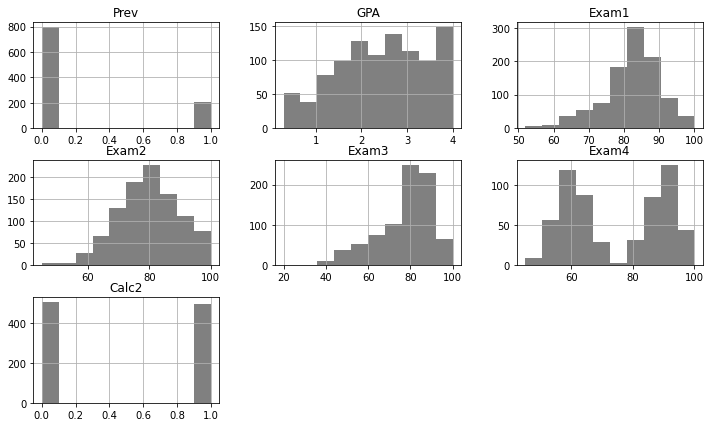

In [30]:
CalcGradesDf.hist(color ='grey',figsize =(12,7))

In [22]:
CalcGradesDf[('Major')].describe()

count     1000
unique       6
top       STEM
freq       317
Name: Major, dtype: object

In [23]:
CalcGradesDf[('Major')].unique()

array(['OTHR', 'STEM', 'PMED', '????', 'ARHU', 'BUSN'], dtype=object)

In [26]:
pd.value_counts(CalcGradesDf['Major'])

STEM    317
OTHR    187
PMED    164
BUSN    156
ARHU     97
????     79
Name: Major, dtype: int64

We notice that Missing values in the 'Major' feature is represented by '????'

<AxesSubplot:>

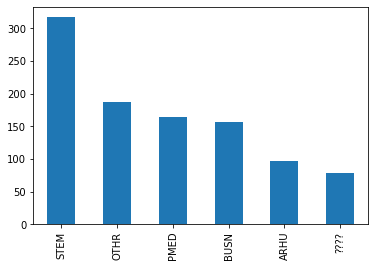

In [27]:
pd.value_counts(CalcGradesDf['Major']).plot(kind='bar')

In [54]:
CalcGradesDf_rep=CalcGradesDf.replace(to_replace='????',
                    value='NA')
CalcGradesDf_rep.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0,1
1,0,STEM,Morning,2.85,81,67,90.0,90.0,1
2,1,STEM,Evening,1.79,90,100,85.0,NaN,1
3,1,PMED,Afternoon,3.59,92,86,95.0,NaN,1
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0,0
5,1,OTHR,Morning,3.89,84,72,88.0,NaN,1
6,0,STEM,Evening,3.94,82,94,85.0,87.0,1
7,0,STEM,Morning,3.59,86,69,78.0,82.0,1
8,0,NA,Morning,1.56,85,100,87.0,87.0,0
9,0,PMED,Morning,2.42,99,75,72.0,53.0,0


We replace '????' by 'NA'

In [43]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(CalcGradesDf_rep.Major, CalcGradesDf_rep.Calc2)

0.08676545689516424

In [48]:
Imputed_Major = pd.DataFrame(CalcGradesDf_rep, columns = ['Major'])
Imputed_Major

,Major
0,OTHR
1,STEM
2,STEM
3,PMED
4,PMED
...,...
995,PMED
996,NA
997,STEM
998,ARHU


In [70]:
from numpy import isnan
from sklearn.impute import SimpleImputer
value = Imputed_Major.values

imputer = SimpleImputer(missing_values='NA',
                        strategy='constant',
                       fill_value='PMED')
Transformed_values = imputer.fit_transform(value)
CalcGrades_imputed = pd.DataFrame(Transformed_values, columns = ['Major'])
CalcGrades_imputed .head(15)

,Major
0,OTHR
1,STEM
2,STEM
3,PMED
4,PMED
5,OTHR
6,STEM
7,STEM
8,PMED
9,PMED


In [71]:
ImputedCalcDf = CalcGradesDf_rep.copy()
CalcGradesDf_rep['Major']=CalcGrades_imputed['Major']
ImputedCalcDf.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0,1
1,0,STEM,Morning,2.85,81,67,90.0,90.0,1
2,1,STEM,Evening,1.79,90,100,85.0,NaN,1
3,1,PMED,Afternoon,3.59,92,86,95.0,NaN,1
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0,0
5,1,OTHR,Morning,3.89,84,72,88.0,NaN,1
6,0,STEM,Evening,3.94,82,94,85.0,87.0,1
7,0,STEM,Morning,3.59,86,69,78.0,82.0,1
8,0,ARHU,Morning,1.56,85,100,87.0,87.0,0
9,0,PMED,Morning,2.42,99,75,72.0,53.0,0


In [72]:
normalized_mutual_info_score(ImputedCalcDf.Major, ImputedCalcDf.Calc2)

0.08388226702259652

Replacing the missing values by PMED results in the least change in the mutual information 

In [76]:
ImputedCalcDf['Calc2'].value_counts()

0    505
1    495
Name: Calc2, dtype: int64

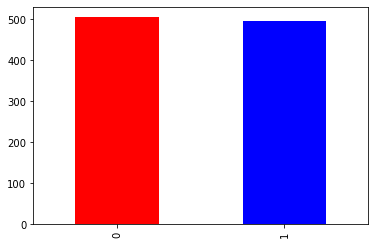

In [73]:
ImputedCalcDf.Calc2.value_counts().plot(kind="bar",color =["red", "blue"]);

In [78]:
table = pd.crosstab(index=ImputedCalcDf["TOD"], 
                           columns=ImputedCalcDf["Calc2"])

table.columns = ["0","1"]
table.index= ["Morning","Afternoon","Evening"]
table

,0,1
Morning,164,203
Afternoon,174,101
Evening,167,191


Notice that a greter percentage of students who take exams in the morning and Evenings go on to take calc 2 as compared to those who take exams  in the afternoon

In [79]:
table = pd.crosstab(index=ImputedCalcDf["Major"], 
                           columns=ImputedCalcDf["Calc2"])

table.columns = ["0","1"]
table.index= ['OTHR', 'STEM', 'PMED', 'ARHU', 'BUSN']
table

,0,1
OTHR,131,45
STEM,98,58
PMED,104,83
ARHU,107,57
BUSN,65,252


Notice from the table that a great deal of BUSN ma jors go on to take CALC2. Greater percentages of ARHU,PMED, and OTHR majors do not take CALC2 which is not surprising. However, it is schocking to note that more STEM students do not take CALC2.

In [87]:
ImputedCalcDfYN = ImputedCalcDf.groupby('Calc2', axis = 0)  ## axis = 0 is rows
ImputedCalcDfY = ImputedCalcDfYN.get_group(1)
ImputedCalcDfN = ImputedCalcDfYN.get_group(0)

In [89]:
ImputedCalcDfYN.mean().select_dtypes([int,float])

,Prev,GPA,Exam1,Exam2,Exam3,Exam4
Calc2,,,,,,
0,0.128713,2.105109,80.302970,79.984158,70.522565,62.541401
1,0.284848,2.794848,83.989899,79.016162,83.384615,87.700730


<AxesSubplot:>

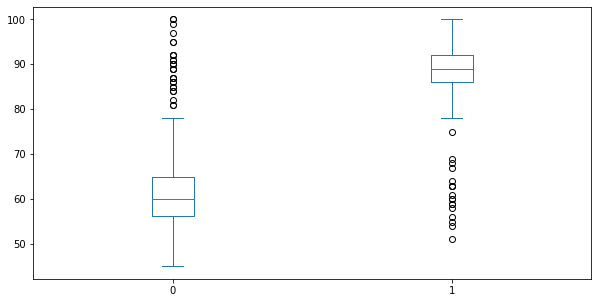

In [93]:
ImputedCalcDf.pivot(columns='Calc2',values= 'Exam4').plot(kind='box',figsize=(10,5))

The boxplot points out that there is a great disparity between the averages in Exams4 of students who took Calc2 and those that did not take Calc2

<AxesSubplot:>

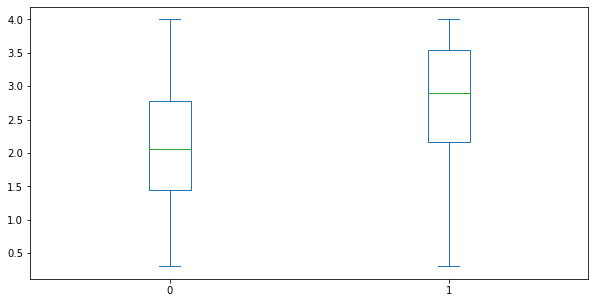

In [279]:
ImputedCalcDf.pivot(columns='Calc2',values= 'GPA').plot(kind='box',figsize=(10,5))

In [ ]:
We Notice that the average GPA of students that take Calc2 tend to be higher than those that do not take.

In [123]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=1)
X_kn1 = ImputedCalcDf[['Exam3','Exam4']]
X_kn1 = imp.fit_transform(X_kn1)
X_kn1 = pd.DataFrame(X_kn1, columns = ['Exam3','Exam4'])
X_kn1.head(15)

,Exam3,Exam4
0,93.0,86.0
1,90.0,90.0
2,85.0,87.0
3,95.0,97.0
4,92.0,69.0
5,88.0,93.0
6,85.0,87.0
7,78.0,82.0
8,87.0,87.0
9,72.0,53.0


While using the KNNImputer, we restrict ourself to 1 neighbor because, the more neighbors we use, the more all the imputed values become average or just like anyone else in the 'Neighborhood'

In [122]:
ImputedCalcGradesDf = ImputedCalcDf.drop(['Exam3','Exam4','Calc2'], axis=1)
New_ImputedCalcGradesDf = pd.concat([TFeatures,X_kn1], axis=1 )  
New_ImputedCalcGradesDf.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0
1,0,STEM,Morning,2.85,81,67,90.0,90.0
2,1,STEM,Evening,1.79,90,100,85.0,87.0
3,1,PMED,Afternoon,3.59,92,86,95.0,97.0
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0
5,1,OTHR,Morning,3.89,84,72,88.0,93.0
6,0,STEM,Evening,3.94,82,94,85.0,87.0
7,0,STEM,Morning,3.59,86,69,78.0,82.0
8,0,ARHU,Morning,1.56,85,100,87.0,87.0
9,0,PMED,Morning,2.42,99,75,72.0,53.0


<AxesSubplot:ylabel='Frequency'>

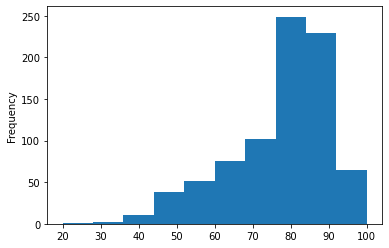

In [100]:
CalcGradesDf['Exam3'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

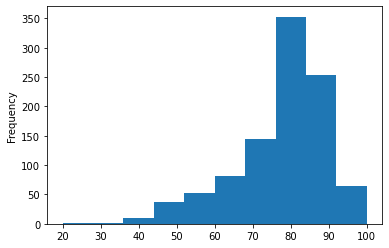

In [99]:
New_ImputedCalcGradesDf['Exam3'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

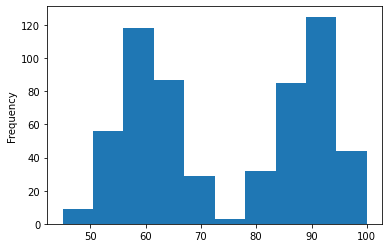

In [118]:
CalcGradesDf['Exam4'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

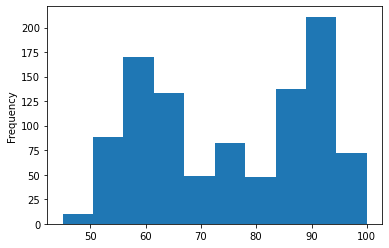

In [117]:
New_ImputedCalcGradesDf['Exam4'].plot(kind='hist')

The plots tell us that there hasnt been a significant change in the shape of the distribution of scores of Exams3 and Exams4 prior to imputations and after imputations.

In [267]:

New_ImputedCalcGradesDf_Calc2 = pd.concat([TFeatures,X_kn1], axis=1 )  
New_ImputedCalcGradesDf.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0
1,0,STEM,Morning,2.85,81,67,90.0,90.0
2,1,STEM,Evening,1.79,90,100,85.0,87.0
3,1,PMED,Afternoon,3.59,92,86,95.0,97.0
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0
5,1,OTHR,Morning,3.89,84,72,88.0,93.0
6,0,STEM,Evening,3.94,82,94,85.0,87.0
7,0,STEM,Morning,3.59,86,69,78.0,82.0
8,0,ARHU,Morning,1.56,85,100,87.0,87.0
9,0,PMED,Morning,2.42,99,75,72.0,53.0


In [268]:
New_ImputedCalcGradesDf.count()

Prev     1000
Major    1000
TOD      1000
GPA      1000
Exam1    1000
Exam2    1000
Exam3    1000
Exam4    1000
dtype: int64

In [ ]:
New_ImputedCalcGradesDfYN.mean().select_dtypes([int,float])

In [153]:
y = CalcGradesDf["Calc2"]
X_1 = New_ImputedCalcGradesDf
y_1 = ImputedCalcDf.select_dtypes([int,float])
X_1.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0
1,0,STEM,Morning,2.85,81,67,90.0,90.0
2,1,STEM,Evening,1.79,90,100,85.0,87.0
3,1,PMED,Afternoon,3.59,92,86,95.0,97.0
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0


In [126]:
X_1.corrwith(y_1)**2

Prev     0.037257
GPA      0.117865
Exam1    0.051376
Exam2    0.002321
Exam3    0.209807
Exam4    0.424937
dtype: float64

In [128]:
CG_Numeric=New_ImputedCalcGradesDf.select_dtypes([int,float])
CG_Numeric

,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,3.10,88,62,93.0,86.0
1,0,2.85,81,67,90.0,90.0
2,1,1.79,90,100,85.0,87.0
3,1,3.59,92,86,95.0,97.0
4,0,3.54,73,91,92.0,69.0
...,...,...,...,...,...,...
995,1,0.82,91,100,73.0,56.0
996,0,0.30,100,74,67.0,55.0
997,0,0.52,87,90,76.0,86.0
998,0,2.31,68,83,68.0,52.0


We perform Principal Components Analysis

In [131]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 5)
CGComps = pca.fit_transform(CG_Numeric[['GPA','Exam1','Exam2','Exam3','Exam4']])
pca.explained_variance_ratio_

array([0.55198044, 0.18207759, 0.15479128, 0.1095126 , 0.00163808])

In [132]:
matrix = CG_Numeric.corr()
print(matrix)

           Prev       GPA     Exam1     Exam2     Exam3     Exam4
Prev   1.000000  0.076838  0.029380  0.057344  0.158124  0.153426
GPA    0.076838  1.000000  0.100864 -0.014994  0.224681  0.307128
Exam1  0.029380  0.100864  1.000000  0.010115  0.148992  0.238931
Exam2  0.057344 -0.014994  0.010115  1.000000 -0.012861 -0.016812
Exam3  0.158124  0.224681  0.148992 -0.012861  1.000000  0.542436
Exam4  0.153426  0.307128  0.238931 -0.016812  0.542436  1.000000


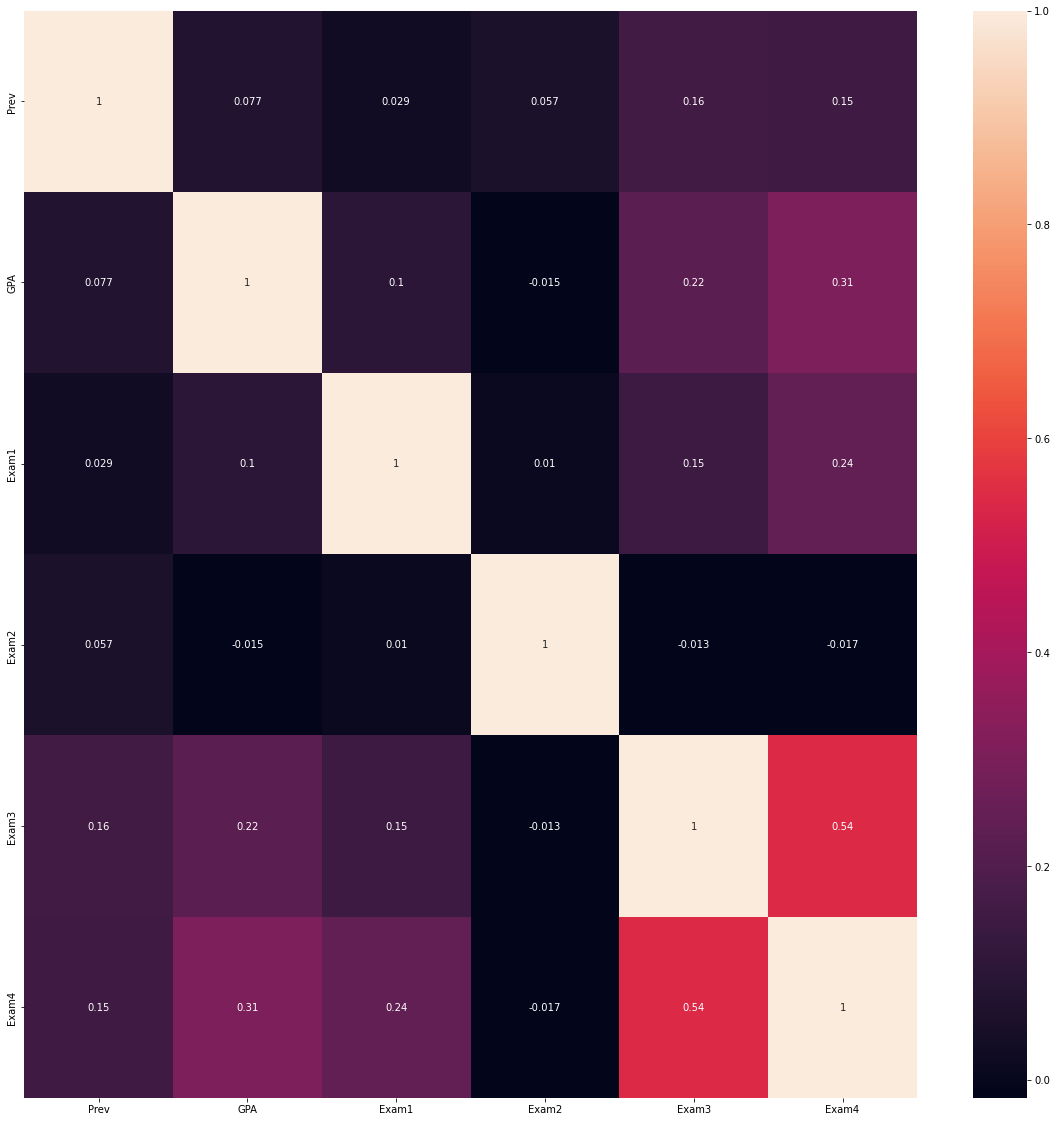

In [134]:
import seaborn as sns
corrmat=CG_Numeric.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(CG_Numeric[top_corr_features].corr(),annot=True)

In [137]:
CGCompsDf = pd.DataFrame(CGComps, columns = ['pc1','pc2','pc3','pc4','pc5'])
CGCompsDf.head()

,pc1,pc2,pc3,pc4,pc5
0,-19.245998,17.116061,-5.801948,-5.111394,-0.323373
1,-19.681587,12.339508,-2.538194,2.971433,-0.052974
2,-15.095018,-20.881029,1.419556,-5.020478,0.920892
3,-29.432591,-7.091965,-0.642780,-5.971023,-0.621492
4,-2.627151,-11.249013,-17.489352,6.642912,-1.142493


In [141]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score, completeness_score, rand_score  
homogeneity_score(y_1,preds)

0.29082031061356467

In [140]:
clstr = SpectralClustering(n_clusters = 2, 
                           affinity = 'nearest_neighbors',
                           n_neighbors=20,
                           assign_labels='discretize')
preds = clstr.fit_predict( CGCompsDf[['pc1']])

homogeneity score = 0.29082


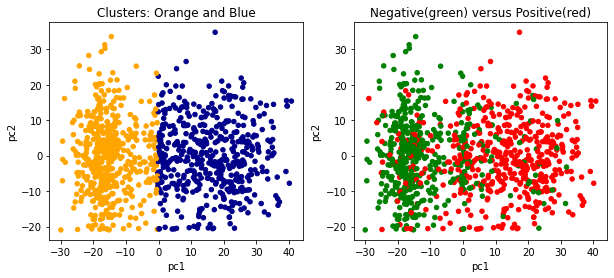

In [148]:
fig,ax = plt.subplots(1,2,figsize = (10,4));
clrs = [ ['orange','darkblue'][i] for i in preds]
CGCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[0],
                      title = 'Clusters: Orange and Blue');
clrs = [ ['red','green'][i] for i in y]
CGCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[1],
                      title = 'Negative(green) versus Positive(red)');
print('homogeneity score = %.5f' % homogeneity_score(y, preds))

In [157]:
X_2 = New_ImputedCalcGradesDf.select_dtypes([int,float])
y_2=ImputedCalcDf.Calc2

In [158]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_2, y_2)
model.coef_[0]

array([ 0.751205  ,  0.47570094,  0.03046206, -0.01405114,  0.03687583,
        0.09216963])

In [159]:
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
columns_to_scale = ['GPA','Exam1','Exam2','Exam3','Exam4']
X_2[columns_to_scale]= standardscaler.fit_transform(X_1[columns_to_scale])
X_2

,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0.650556,0.722030,-1.742572,1.279266,0.727147
1,0,0.401671,-0.138701,-1.244837,1.042435,0.993403
2,1,-0.653603,0.967953,2.040218,0.647716,0.793711
3,1,1.138371,1.213876,0.646558,1.437154,1.459351
4,0,1.088594,-1.122393,1.144294,1.200322,-0.404440
...,...,...,...,...,...,...
995,1,-1.619278,1.090914,2.040218,-0.299610,-1.269771
996,0,-2.136959,2.197568,-0.548007,-0.773273,-1.336335
997,0,-1.917940,0.599068,1.044747,-0.062779,0.727147
998,0,-0.135921,-1.737200,0.347917,-0.694330,-1.536027


In [160]:
model = LogisticRegression()
model.fit(X_2, y_2)
model.coef_[0]

array([ 0.74940356,  0.47833712,  0.24677436, -0.13945711,  0.4671421 ,
        1.37092595])

X_2: Prev, Score: 0.74940
X_2: GPA, Score: 0.47834
X_2: Exam1, Score: 0.24677
X_2: Exam2, Score: -0.13946
X_2: Exam3, Score: 0.46714
X_2: Exam4, Score: 1.37093


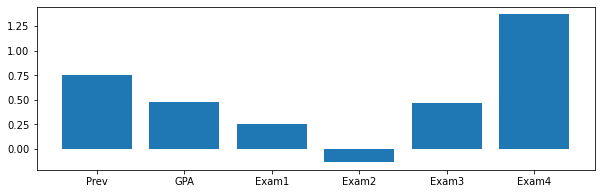

In [161]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('X_2: %s, Score: %.5f' % (X_2.columns[i],v))
# plot feature importance
plt.figure(figsize=(10,3))
plt.bar(X_2.columns, importance);

In [163]:
Xtrain = New_ImputedCalcGradesDf
Response = ImputedCalcDf.Calc2
Xtrain.head(10)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,1,OTHR,Afternoon,3.10,88,62,93.0,86.0
1,0,STEM,Morning,2.85,81,67,90.0,90.0
2,1,STEM,Evening,1.79,90,100,85.0,87.0
3,1,PMED,Afternoon,3.59,92,86,95.0,97.0
4,0,PMED,Afternoon,3.54,73,91,92.0,69.0
5,1,OTHR,Morning,3.89,84,72,88.0,93.0
6,0,STEM,Evening,3.94,82,94,85.0,87.0
7,0,STEM,Morning,3.59,86,69,78.0,82.0
8,0,ARHU,Morning,1.56,85,100,87.0,87.0
9,0,PMED,Morning,2.42,99,75,72.0,53.0


In [164]:
from sklearn.preprocessing import OneHotEncoder
categories = Xtrain.select_dtypes(exclude = [int,float]).columns
categories

Index(['Major', 'TOD'], dtype='object')

In [165]:
ohe = OneHotEncoder( dtype = int )
Xtrain_new = Xtrain.copy()

for category in categories: 
    encoded = ohe.fit_transform( Xtrain[ [category] ] )
    oheDf = pd.DataFrame( encoded.todense(), 
                          columns = ohe.categories_[0])

    Xtrain_new = pd.concat([oheDf,Xtrain_new], axis=1 )  
    Xtrain_new.drop(category, axis=1, inplace=True)
Xtrain_new.head(10)

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,1,0,0,1,3.10,88,62,93.0,86.0
1,0,0,1,0,0,0,0,1,0,2.85,81,67,90.0,90.0
2,0,1,0,0,0,0,0,1,1,1.79,90,100,85.0,87.0
3,1,0,0,0,0,0,1,0,1,3.59,92,86,95.0,97.0
4,1,0,0,0,0,0,1,0,0,3.54,73,91,92.0,69.0
5,0,0,1,0,0,1,0,0,1,3.89,84,72,88.0,93.0
6,0,1,0,0,0,0,0,1,0,3.94,82,94,85.0,87.0
7,0,0,1,0,0,0,0,1,0,3.59,86,69,78.0,82.0
8,0,0,1,1,0,0,0,0,0,1.56,85,100,87.0,87.0
9,0,0,1,0,0,0,1,0,0,2.42,99,75,72.0,53.0


In [167]:
model = LogisticRegression()
model.fit(Xtrain_new, y_2)
model.coef_[0]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.49608322, -1.93859889, -1.39380723, -1.31513375, -1.24599709,
       -1.10867767, -1.30355709,  0.14487626,  0.67888235,  0.36276415,
        0.00799352, -0.02435065,  0.02246943,  0.08433105])

In [169]:
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
columns_to_scale = ['GPA','Exam1','Exam2','Exam3','Exam4']
Xtrain_new[columns_to_scale]= standardscaler.fit_transform(Xtrain_new[columns_to_scale])
Xtrain_new

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,1,0,0,1,0.650556,0.722030,-1.742572,1.279266,0.727147
1,0,0,1,0,0,0,0,1,0,0.401671,-0.138701,-1.244837,1.042435,0.993403
2,0,1,0,0,0,0,0,1,1,-0.653603,0.967953,2.040218,0.647716,0.793711
3,1,0,0,0,0,0,1,0,1,1.138371,1.213876,0.646558,1.437154,1.459351
4,1,0,0,0,0,0,1,0,0,1.088594,-1.122393,1.144294,1.200322,-0.404440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,1,0,1,-1.619278,1.090914,2.040218,-0.299610,-1.269771
996,0,1,0,1,0,0,0,0,0,-2.136959,2.197568,-0.548007,-0.773273,-1.336335
997,1,0,0,0,0,0,0,1,0,-1.917940,0.599068,1.044747,-0.062779,0.727147
998,0,1,0,1,0,0,0,0,0,-0.135921,-1.737200,0.347917,-0.694330,-1.536027


In [269]:
Xtrain_new.describe()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.367000,0.275000,0.358000,0.176000,0.156000,0.187000,0.164000,0.31700,0.206000,3.548828e-16,2.442491e-17,3.954614e-16,6.532552e-16,5.571654e-16
std,0.482228,0.446738,0.479652,0.381011,0.363037,0.390107,0.370461,0.46554,0.404633,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2.136959e+00,-3.704584e+00,-3.434873e+00,-4.483633e+00,-2.001975e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-7.282682e-01,-5.075851e-01,-6.475539e-01,-4.574981e-01,-9.369516e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.820929e-02,1.072224e-01,4.927582e-02,1.740526e-01,-5.396028e-02
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,7.700212e-01,5.990684e-01,7.461056e-01,6.477155e-01,9.934033e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.546543e+00,2.197568e+00,2.040218e+00,1.831873e+00,1.659043e+00


In [173]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Xtrain_new: %s, Score: %.5f' % (X_1.columns[i],v))
# plot feature importance
plt.figure(figsize=(18,9))
plt.bar(Xtrain_new.columns, importance);

Xtrain_new: Prev, Score: -1.49608
Xtrain_new: Major, Score: -1.93860
Xtrain_new: TOD, Score: -1.39381
Xtrain_new: GPA, Score: -1.31513
Xtrain_new: Exam1, Score: -1.24600
Xtrain_new: Exam2, Score: -1.10868
Xtrain_new: Exam3, Score: -1.30356
Xtrain_new: Exam4, Score: 0.14488


IndexError: index 8 is out of bounds for axis 0 with size 8

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(
        Xtrain_new, #
        y_2,
        train_size=0.80, 
        random_state=1234)

In [180]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dtc.fit(X_train, y_train)
dtc.score(X_test,y_test)

0.865

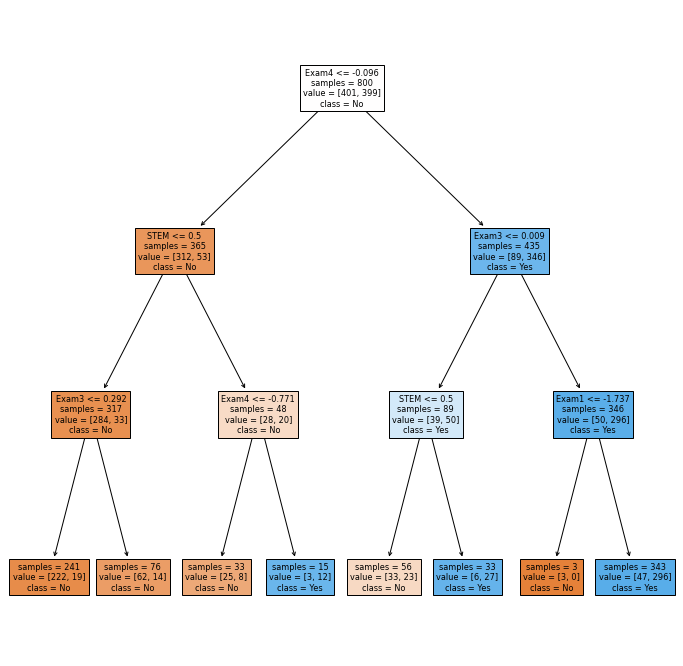

In [181]:
plt.subplots(figsize = (12,12))
plot_tree(dtc, filled = True, feature_names=X_train.columns,
          class_names = ['No','Yes'], impurity = False);

In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 100, max_depth = 4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
actpredDf = pd.DataFrame( {'y_actual':y_test, 'y_pred':y_pred } )
actpredDf.T

,681,990,155,768,438,363,688,555,620,99,...,230,83,504,109,320,376,731,594,65,401
y_actual,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
y_pred,1,1,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


In [184]:
Grades_TestSet = pd.read_csv('PatrickDonkohTest.csv')
Grades_TestSet.head(10)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,OTHR,Afternoon,2.38,85,87,44.0,NaN,0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0,0
2,0,PMED,Morning,1.42,77,91,72.0,63.0,0
3,0,STEM,Evening,1.08,84,65,85.0,NaN,1
4,0,BUSN,Afternoon,3.30,84,84,48.0,NaN,0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0,1
6,0,OTHR,Afternoon,2.01,88,79,NaN,68.0,0
7,0,ARHU,Evening,2.05,81,78,56.0,NaN,0
8,0,OTHR,Afternoon,0.85,73,91,68.0,NaN,0
9,0,PMED,Morning,2.87,73,89,60.0,62.0,0


In [189]:
Grades_TestSet.describe()

,Prev,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
count,200.000000,200.000000,200.000000,200.000000,176.000000,112.000000,200.000000
mean,0.220000,2.365550,82.280000,80.440000,78.170455,75.062500,0.525000
std,0.415286,1.022758,8.256053,9.911995,12.838978,15.353657,0.500628
min,0.000000,0.300000,54.000000,51.000000,33.000000,50.000000,0.000000
25%,0.000000,1.637500,78.000000,74.000000,72.000000,60.750000,0.000000
50%,0.000000,2.385000,83.500000,81.000000,82.000000,81.000000,1.000000
75%,0.000000,3.117500,87.000000,87.000000,88.000000,89.000000,1.000000
max,1.000000,4.000000,100.000000,100.000000,100.000000,98.000000,1.000000


In [187]:
XTest_kn1 = Grades_TestSet[['Exam3','Exam4']]
XTest_kn1 = imp.fit_transform(XTest_kn1)
XTest_kn1 = pd.DataFrame(XTest_kn1, columns = ['Exam3','Exam4'])
XTest_kn1.head(15)

,Exam3,Exam4
0,44.0,63.0
1,85.0,86.0
2,72.0,63.0
3,85.0,86.0
4,48.0,63.0
5,90.0,91.0
6,89.0,68.0
7,56.0,64.0
8,68.0,64.0
9,60.0,62.0


In [191]:
TestSet_Copy = Grades_TestSet.copy()
TestSet_Copy['Exam3']=XTest_kn1.Exam3
TestSet_Copy.head(10)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,OTHR,Afternoon,2.38,85,87,44.0,NaN,0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0,0
2,0,PMED,Morning,1.42,77,91,72.0,63.0,0
3,0,STEM,Evening,1.08,84,65,85.0,NaN,1
4,0,BUSN,Afternoon,3.30,84,84,48.0,NaN,0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0,1
6,0,OTHR,Afternoon,2.01,88,79,89.0,68.0,0
7,0,ARHU,Evening,2.05,81,78,56.0,NaN,0
8,0,OTHR,Afternoon,0.85,73,91,68.0,NaN,0
9,0,PMED,Morning,2.87,73,89,60.0,62.0,0


In [194]:
TestSet_Copy1 = TestSet_Copy.copy()
TestSet_Copy1['Exam4']=XTest_kn1.Exam4
TestSet_Copy1.head(10)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,OTHR,Afternoon,2.38,85,87,44.0,63.0,0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0,0
2,0,PMED,Morning,1.42,77,91,72.0,63.0,0
3,0,STEM,Evening,1.08,84,65,85.0,86.0,1
4,0,BUSN,Afternoon,3.30,84,84,48.0,63.0,0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0,1
6,0,OTHR,Afternoon,2.01,88,79,89.0,68.0,0
7,0,ARHU,Evening,2.05,81,78,56.0,64.0,0
8,0,OTHR,Afternoon,0.85,73,91,68.0,64.0,0
9,0,PMED,Morning,2.87,73,89,60.0,62.0,0


In [196]:
pd.value_counts(TestSet_Copy1['Major'])

STEM    54
OTHR    40
BUSN    33
PMED    30
ARHU    22
????    21
Name: Major, dtype: int64

In [197]:
ImputedTestSet_Copy1=TestSet_Copy1.replace(to_replace='????',
                    value='NA')
ImputedTestSet_Copy1.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,OTHR,Afternoon,2.38,85,87,44.0,63.0,0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0,0
2,0,PMED,Morning,1.42,77,91,72.0,63.0,0
3,0,STEM,Evening,1.08,84,65,85.0,86.0,1
4,0,BUSN,Afternoon,3.30,84,84,48.0,63.0,0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0,1
6,0,OTHR,Afternoon,2.01,88,79,89.0,68.0,0
7,0,ARHU,Evening,2.05,81,78,56.0,64.0,0
8,0,OTHR,Afternoon,0.85,73,91,68.0,64.0,0
9,0,PMED,Morning,2.87,73,89,60.0,62.0,0


In [202]:
normalized_mutual_info_score(ImputedTestSet_Copy1.Major, ImputedTestSet_Copy1.Calc2)

0.1465923606228173

In [198]:
ImputedTestSet_Major = pd.DataFrame(ImputedTestSet_Copy1, columns = ['Major'])
ImputedTestSet_Major

,Major
0,OTHR
1,STEM
2,PMED
3,STEM
4,BUSN
...,...
195,PMED
196,OTHR
197,STEM
198,BUSN


In [199]:
value = ImputedTestSet_Major.values

imputer = SimpleImputer(missing_values='NA',
                        strategy='constant',
                       fill_value='PMED')
Transformed_values1 = imputer.fit_transform(value)
TestCalcGrades_imputed = pd.DataFrame(Transformed_values1, columns = ['Major'])
TestCalcGrades_imputed .head(15)

,Major
0,OTHR
1,STEM
2,PMED
3,STEM
4,BUSN
5,STEM
6,OTHR
7,ARHU
8,OTHR
9,PMED


In [200]:
ImputedCalcTestDf = ImputedTestSet_Copy1.copy()
ImputedTestSet_Copy1['Major']=TestCalcGrades_imputed['Major']
ImputedCalcTestDf.head(15)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4,Calc2
0,0,OTHR,Afternoon,2.38,85,87,44.0,63.0,0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0,0
2,0,PMED,Morning,1.42,77,91,72.0,63.0,0
3,0,STEM,Evening,1.08,84,65,85.0,86.0,1
4,0,BUSN,Afternoon,3.30,84,84,48.0,63.0,0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0,1
6,0,OTHR,Afternoon,2.01,88,79,89.0,68.0,0
7,0,ARHU,Evening,2.05,81,78,56.0,64.0,0
8,0,OTHR,Afternoon,0.85,73,91,68.0,64.0,0
9,0,PMED,Morning,2.87,73,89,60.0,62.0,0


In [226]:
ImputedCalcTestDf.count()

Prev     200
Major    200
TOD      200
GPA      200
Exam1    200
Exam2    200
Exam3    200
Exam4    200
Calc2    200
dtype: int64

In [228]:
ImputedCalcTestDf1=ImputedCalcTestDf.drop(['Calc2'],axis=1)
ImputedCalcTestDf1.head()

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,0,OTHR,Afternoon,2.38,85,87,44.0,63.0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0
2,0,PMED,Morning,1.42,77,91,72.0,63.0
3,0,STEM,Evening,1.08,84,65,85.0,86.0
4,0,BUSN,Afternoon,3.30,84,84,48.0,63.0


In [201]:
normalized_mutual_info_score(ImputedCalcTestDf.Major, ImputedTestSet_Copy1.Calc2)

0.13617369737958515

In [210]:
Cat_ImputedCalcTestDf=ImputedCalcTestDf.select_dtypes(exclude = [int,float]).columns
Cat_ImputedCalcTestDf

Index(['Major', 'TOD'], dtype='object')

In [235]:
ImputedCalcTestDf.Calc2.count()

200

In [229]:
Xtrain1 = ImputedCalcTestDf1
Response1 = ImputedCalcTestDf.Calc2
Xtrain1.head(10)

,Prev,Major,TOD,GPA,Exam1,Exam2,Exam3,Exam4
0,0,OTHR,Afternoon,2.38,85,87,44.0,63.0
1,1,STEM,Afternoon,1.98,86,82,85.0,86.0
2,0,PMED,Morning,1.42,77,91,72.0,63.0
3,0,STEM,Evening,1.08,84,65,85.0,86.0
4,0,BUSN,Afternoon,3.30,84,84,48.0,63.0
5,0,STEM,Afternoon,3.66,74,86,90.0,91.0
6,0,OTHR,Afternoon,2.01,88,79,89.0,68.0
7,0,ARHU,Evening,2.05,81,78,56.0,64.0
8,0,OTHR,Afternoon,0.85,73,91,68.0,64.0
9,0,PMED,Morning,2.87,73,89,60.0,62.0


In [230]:
Xtrain1.count()

Prev     200
Major    200
TOD      200
GPA      200
Exam1    200
Exam2    200
Exam3    200
Exam4    200
dtype: int64

In [231]:
ohe = OneHotEncoder( dtype = int )
Xtrain_new1 = Xtrain1.copy()

for category in categories: 
    encoded = ohe.fit_transform( Xtrain1[ [category] ] )
    oheDf = pd.DataFrame( encoded.todense(), 
                          columns = ohe.categories_[0])

    Xtrain_new1 = pd.concat([oheDf,Xtrain_new1], axis=1 )  
    Xtrain_new1.drop(category, axis=1, inplace=True)
Xtrain_new1.head(10)

,Afternoon,Evening,Morning,ARHU,BUSN,NA,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,0,1,0,0,0,2.38,85,87,44.0,63.0
1,1,0,0,0,0,0,0,0,1,1,1.98,86,82,85.0,86.0
2,0,0,1,0,0,0,0,1,0,0,1.42,77,91,72.0,63.0
3,0,1,0,0,0,0,0,0,1,0,1.08,84,65,85.0,86.0
4,1,0,0,0,1,0,0,0,0,0,3.30,84,84,48.0,63.0
5,1,0,0,0,0,0,0,0,1,0,3.66,74,86,90.0,91.0
6,1,0,0,0,0,0,1,0,0,0,2.01,88,79,89.0,68.0
7,0,1,0,1,0,0,0,0,0,0,2.05,81,78,56.0,64.0
8,1,0,0,0,0,0,1,0,0,0,0.85,73,91,68.0,64.0
9,0,0,1,0,0,0,0,1,0,0,2.87,73,89,60.0,62.0


In [240]:
columns_to_scale = ['Exam1','Exam2','Exam3','Exam4']
Xtrain_use[columns_to_scale]= standardscaler.fit_transform(Xtrain_use[columns_to_scale])
Xtrain_use

,Afternoon,Evening,Morning,ARHU,BUSN,NA,OTHR,PMED,STEM,Prev,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,0,1,0,0,0,0.330282,0.663485,-2.764237,-0.848242
1,1,0,0,0,0,0,0,0,1,1,0.451709,0.157780,0.554290,0.733721
2,0,0,1,0,0,0,0,1,0,0,-0.641136,1.068049,-0.497926,-0.848242
3,0,1,0,0,0,0,0,0,1,0,0.208855,-1.561618,0.554290,0.733721
4,1,0,0,0,1,0,0,0,0,0,0.208855,0.360062,-2.440478,-0.848242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,0,0,0,0,1,0,0,-0.641136,1.978319,-2.035780,-0.779461
196,1,0,0,0,0,0,1,0,0,0,0.208855,0.562344,0.311471,-0.573118
197,0,0,1,0,0,0,0,0,1,1,-0.034000,0.258921,0.068652,1.352750
198,0,0,1,0,1,0,0,0,0,0,-0.155427,-0.550207,0.068652,0.871283


In [280]:
Xtrain_use=Xtrain_new1.drop(['NA'],axis=1)
Xtrain_use.head()

,Afternoon,Evening,Morning,ARHU,BUSN,OTHR,PMED,STEM,Prev,GPA,Exam1,Exam2,Exam3,Exam4
0,1,0,0,0,0,1,0,0,0,0.014164,0.330282,0.663485,-2.764237,-0.848242
1,1,0,0,0,0,0,0,1,1,-0.377917,0.451709,0.157780,0.554290,0.733721
2,0,0,1,0,0,0,1,0,0,-0.926830,-0.641136,1.068049,-0.497926,-0.848242
3,0,1,0,0,0,0,0,1,0,-1.260098,0.208855,-1.561618,0.554290,0.733721
4,1,0,0,0,1,0,0,0,0,0.915949,0.208855,0.360062,-2.440478,-0.848242


In [233]:
Xtrain_new1.count()

Afternoon    200
Evening      200
Morning      200
ARHU         200
BUSN         200
NA           200
OTHR         200
PMED         200
STEM         200
Prev         200
GPA          200
Exam1        200
Exam2        200
Exam3        200
Exam4        200
dtype: int64

In [281]:
y_pred = rfc.predict(Xtrain_use)
actpredDf = pd.DataFrame( {'y_actual':Response1, 'y_pred':Response1 } )
actpredDf.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
y_actual,0,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
y_pred,0,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0


In [282]:
rfc.score(Xtrain_use,Response1)

0.87

In [283]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth':[None,2,3,4,5,6,7], 'min_samples_leaf':range(1,10,4) }
clf = GridSearchCV(rfc, parameters, cv = 5)
clf.fit(Xtrain_use, Response1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': range(1, 10, 4)})

In [286]:
clf.best_params_

{'max_depth': None, 'min_samples_leaf': 1}

In [285]:
clf.best_score_

0.8949999999999999

In [287]:
rfc_best = clf.best_estimator_

In [288]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_best,Xtrain_use, Response1, cv=5).mean()

0.865

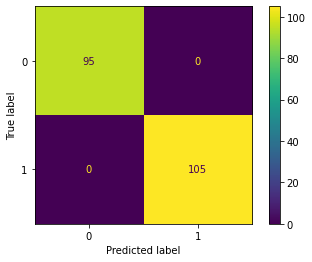

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(actpredDf['y_actual'], actpredDf['y_pred'])
ConfusionMatrixDisplay(cfm).plot();

In [289]:
cfm = pd.crosstab(actpredDf['y_actual'], actpredDf['y_pred'], 
                  rownames=['Actual'], colnames=['Predicted'], margins = True)
cfm

Predicted,0,1,All
Actual,,,
0,95,0,95
1,0,105,105
All,95,105,200


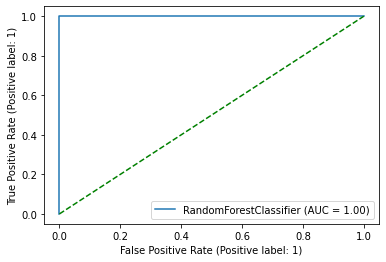

In [290]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc_best, Xtrain_use,Response1)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');

In [291]:
rfc_best.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2021450944),
 DecisionTreeClassifier(max_features='auto', random_state=1614266975),
 DecisionTreeClassifier(max_features='auto', random_state=1437021508),
 DecisionTreeClassifier(max_features='auto', random_state=795969308),
 DecisionTreeClassifier(max_features='auto', random_state=1543143811),
 DecisionTreeClassifier(max_features='auto', random_state=1767066815),
 DecisionTreeClassifier(max_features='auto', random_state=1260292499),
 DecisionTreeClassifier(max_features='auto', random_state=1706343973),
 DecisionTreeClassifier(max_features='auto', random_state=226515464),
 DecisionTreeClassifier(max_features='auto', random_state=1954951257),
 DecisionTreeClassifier(max_features='auto', random_state=735130041),
 DecisionTreeClassifier(max_features='auto', random_state=1816649760),
 DecisionTreeClassifier(max_features='auto', random_state=2133202416),
 DecisionTreeClassifier(max_features='auto', random_state=660774913),
 DecisionT

In [292]:
ScoresAndTrees = { 'scores': [] , 'trees': [] }
for Tree in rfc_best.estimators_:
    ScoresAndTrees['scores'].append(Tree.score(Xtrain_use.values, Response1.values))
    ScoresAndTrees['trees'].append(Tree)
ScoresAndTreesDf = pd.DataFrame(ScoresAndTrees)
ScoresAndTreesDf.sort_values('scores', inplace = True, ascending = False)

In [259]:
ScoresAndTreesDf.reset_index(drop = True, inplace = True)
ScoresAndTreesDf.head(15)

,scores,trees
0,0.875,"DecisionTreeClassifier(max_depth=2, max_featur..."
1,0.875,"DecisionTreeClassifier(max_depth=2, max_featur..."
2,0.870,"DecisionTreeClassifier(max_depth=2, max_featur..."
3,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
4,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
5,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
6,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
7,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
8,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."
9,0.865,"DecisionTreeClassifier(max_depth=2, max_featur..."


We Notice that a Dcision tree with a depth of 2 produces the best score.

In [293]:
Tree1 = ScoresAndTreesDf.trees[0]
Tree1.score(Xtrain_use,Response1)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.945

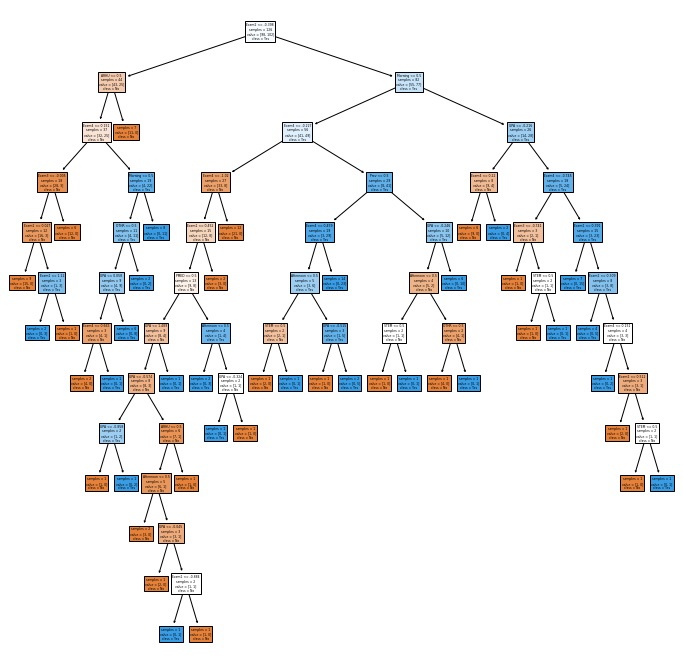

In [294]:
plt.subplots(figsize = (12,12))
plot_tree(Tree1, filled = True, feature_names=Xtrain_use.columns,
                 class_names = ['No','Yes'], impurity = False);

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(
        Xtrain_new, #
        Response,
        train_size=0.80, 
        random_state=1234)

In [299]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dtc.fit(X_train, y_train)
dtc.score(X_test,y_test)

0.865

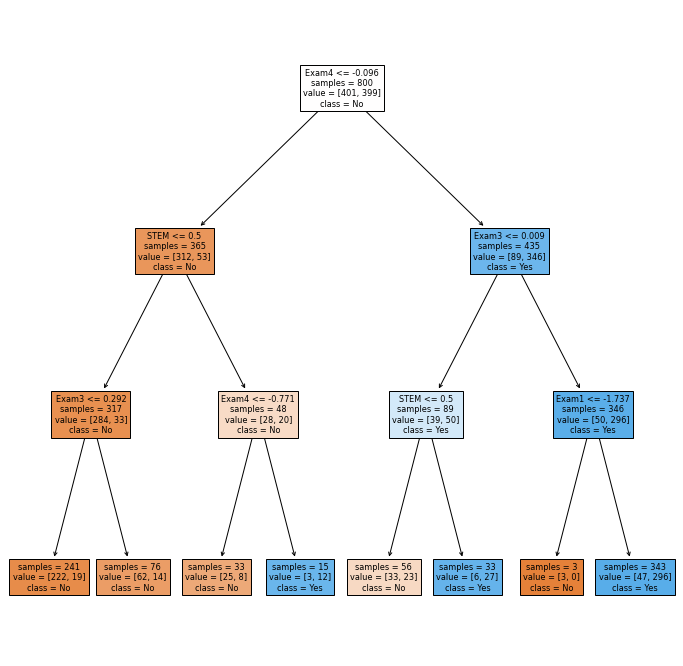

In [300]:
plt.subplots(figsize = (12,12))
plot_tree(dtc, filled = True, feature_names=X_train.columns,
          class_names = ['No','Yes'], impurity = False);

In [301]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 100, max_depth = 4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
actpredDf = pd.DataFrame( {'y_actual':y_test, 'y_pred':y_pred } )
actpredDf.T


,681,990,155,768,438,363,688,555,620,99,...,230,83,504,109,320,376,731,594,65,401
y_actual,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
y_pred,1,1,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


we observed from explorations that students wh take Calc2 have an average GPA of 2.795.

From the Decision tree, we can ask the question, is a student's scaled Exam4 score less than -0.096?
If yes then there is a greater chance that they do not take Calc2. if No, then we can go on to ask further questions. By asking these series of questions, we can come to the these 3 classes of students that actually take Calc2.
1. a non-STEM student with a scaled EXam4 score of more than -0.771.
2. A student with a scaled Exam4 score of more than -0.096, a scaled Exam3 score of more than 0.009 and a scaled Exam1 score of more than -1.737.
3. A non-STEM student with a scaled Exam4 score of more than -0.096 and a possible Exam3 score of less than 0.009.

The clients should focus on these 3 groups of students to increse enrollment in the Calc2 class.